In [1]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import random
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [2]:
#Setup
from pathlib import Path

IMAGES_PATH = Path() / "results"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="jpg", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
#Read new csv and show
df = pd.read_csv('./data/KDinputer.csv')
df.drop('Unnamed: 0', axis= 1, inplace= True) #No needed it 
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,1.0,1.0,0.0,0.0,121.0,...,44.0,7800.0,5.20,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,7.0,50.0,1.020,4.0,0.0,1.0,1.0,0.0,0.0,121.2,...,38.0,6000.0,5.26,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,423.0,...,31.0,7500.0,4.32,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,117.0,...,32.0,6700.0,3.90,1.0,0.0,0.0,1.0,1.0,1.0,0.0
4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,106.0,...,35.0,7300.0,4.60,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,140.0,...,47.0,6700.0,4.90,0.0,0.0,0.0,0.0,0.0,0.0,1.0
396,42.0,70.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,75.0,...,54.0,7800.0,6.20,0.0,0.0,0.0,0.0,0.0,0.0,1.0
397,12.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,100.0,...,49.0,6600.0,5.40,0.0,0.0,0.0,0.0,0.0,0.0,1.0
398,17.0,60.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,114.0,...,51.0,7200.0,5.90,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [11]:
#train_test_split and x, y declarations
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

print('x_train:', len(X_train),'\n',
      'y_train:', len(y_train),'\n',
      'x_test:', len(X_test),'\n',
      'y_test:', len(y_test))


x_train: 320 
 y_train: 320 
 x_test: 80 
 y_test: 80


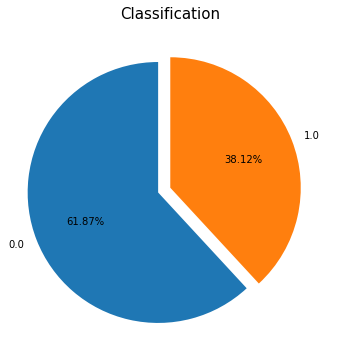

In [10]:
attr_count = y_train.value_counts()
attr_label = y_train.value_counts().index

# plot
fig, ax = plt.subplots(figsize=(14, 6))
ax.pie(attr_count, explode=(0.1, 0), labels=attr_label, autopct='%.2f%%', startangle=90)
ax.set_title('Classification', fontsize=15)
plt.show()

In [12]:
#DTC and accuracy_score
acd = tree.DecisionTreeClassifier()

model = acd.fit(X_train, y_train)

y_pred = acd.predict(X_test)
acd_acc = accuracy_score(y_test, y_pred)

print (f"Accuracy_score is:" , acd_acc)

Accuracy_score is: 0.9375


[Text(0.6166666666666667, 0.9285714285714286, 'X[14] <= 13.25\ngini = 0.472\nsamples = 320\nvalue = [198, 122]'),
 Text(0.43333333333333335, 0.7857142857142857, 'X[15] <= 44.6\ngini = 0.08\nsamples = 191\nvalue = [183, 8]'),
 Text(0.26666666666666666, 0.6428571428571429, 'X[15] <= 40.2\ngini = 0.052\nsamples = 187\nvalue = [182, 5]'),
 Text(0.13333333333333333, 0.5, 'X[17] <= 6.04\ngini = 0.012\nsamples = 168\nvalue = [167, 1]'),
 Text(0.06666666666666667, 0.35714285714285715, 'gini = 0.0\nsamples = 166\nvalue = [166, 0]'),
 Text(0.2, 0.35714285714285715, 'X[10] <= 85.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.13333333333333333, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.26666666666666666, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4, 0.5, 'X[10] <= 17.5\ngini = 0.332\nsamples = 19\nvalue = [15, 4]'),
 Text(0.3333333333333333, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.4666666666666667,

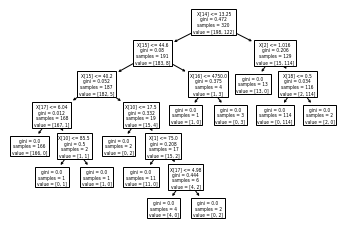

In [13]:
#Visualization of the tree
tree.plot_tree(acd)

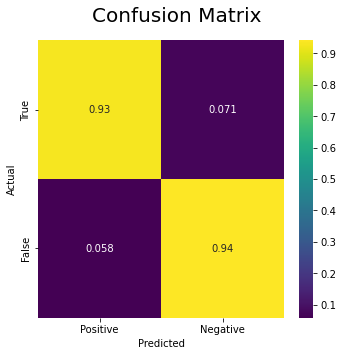

In [14]:
#Matrix Confusion
cm = confusion_matrix( y_test, y_pred, labels=[True, False])
cmn = (cm.astype('float') / cm.sum(axis=1)[:, np.newaxis])#*100
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cmn,annot=True, cmap='viridis', xticklabels=["Positive", "Negative"], yticklabels=[True, False])
plt.suptitle("Confusion Matrix", fontsize= 20)
plt.ylabel('Actual')
plt.xlabel('Predicted')

save_fig("matrix_confusion")
plt.show()

In [15]:
cm # Confusion matrix

array([[26,  2],
       [ 3, 49]], dtype=int64)

In [16]:
#classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95        52
         1.0       0.90      0.93      0.91        28

    accuracy                           0.94        80
   macro avg       0.93      0.94      0.93        80
weighted avg       0.94      0.94      0.94        80



In [17]:
# Getting precision, recall, F1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

acc = accuracy_score(y_test, y_pred)
acc = round(acc, 2)
print('accuracy:', acc)

prc = precision_score(y_test, y_pred)
prc = round(prc, 2)
print('precision_score:', prc)

rcll = recall_score(y_test, y_pred)
rcll = round(rcll, 2)
print('recall_score:', rcll)

f1scr = f1_score(y_test, y_pred)
f1scr = round(f1scr, 2)
print('f1_score:', f1scr)

accuracy: 0.94
precision_score: 0.9
recall_score: 0.93
f1_score: 0.91


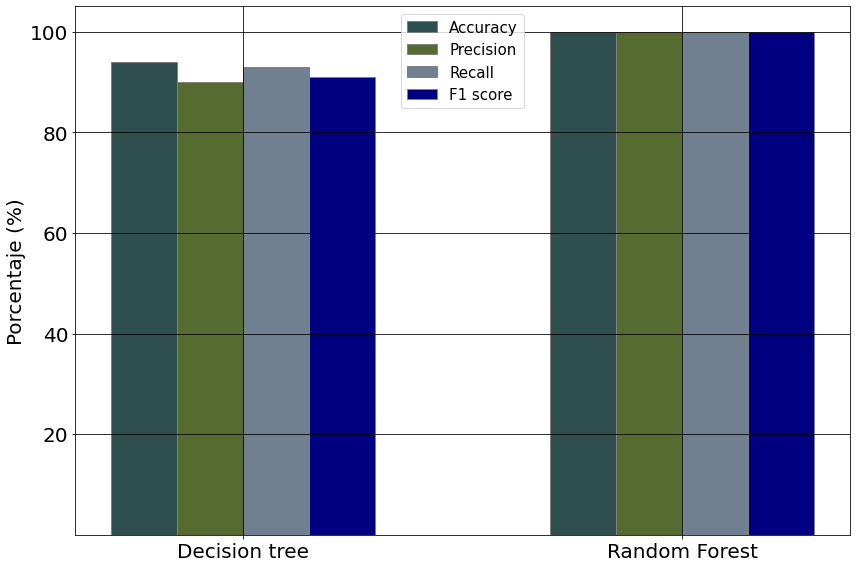

In [18]:
# Ploting accuracy, precision_score, recall_score, f1_score

# Set width of bar
barWidth = 0.15
fig = plt.subplots(figsize=(12, 8))

# Set height of bar

models = ['Decision tree', 'Random Forest']
accuracy = [94, 100]
precision = [90, 100]
recall = [93, 100]
f1_score = [91, 100]

# St positions of bat on X axis
pos1_acc = np.arange(len(accuracy))
pos2_pre = [x + barWidth for x in pos1_acc]
pos3_rec = [x + barWidth for x in pos2_pre]
pos4_f1 = [x + barWidth for x in pos3_rec]

# Mat the plot
plt.bar(pos1_acc, accuracy, color='darkslategray', width=barWidth, 
    edgecolor='grey', label='Accuracy')
plt.bar(pos2_pre, precision, color='darkolivegreen', width=barWidth,
    edgecolor='grey', label='Precision')
plt.bar(pos3_rec, recall, color='slategray', width=barWidth,
    edgecolor='grey', label='Recall')
plt.bar(pos4_f1, f1_score, color='navy', width=barWidth,
    edgecolor='grey', label='F1 score')


# Adding Xticks
plt.ylabel('Porcentaje (%)', fontsize=20)
plt.xticks([r + 1.5*barWidth for r in range(len(accuracy))], models, fontsize=20)
plt.yticks([20, 40, 60, 80, 100], fontsize=20)

plt.legend(fontsize=15, loc="upper center")
plt.grid(color="black")
save_fig("comparison_models")

plt.show()

In [19]:
# Getting probabilities
y_pred_proba = acd.predict_proba(x_test)
y_score = y_pred_proba[:, 1]

In [20]:
l = list(y_score)
l.count(0)

51

In [21]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, y_score)
threshold = 0.5

In [24]:
recalls

array([1.        , 0.92857143, 0.        ])

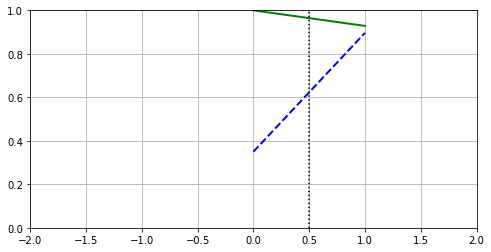

In [25]:
# Plotting precision and recall of threshold
plt.figure(figsize=(8, 4))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

# Beautifies the figure
#idx = (thresholds >= threshold).argmax() # First index
#plt.plot(thresholds[idx], precisions[idx], "bo")
#plt.plot(thresholds[idx], recalls[idx], "go")

plt.axis([-2, 2, 0, 1])
plt.grid()

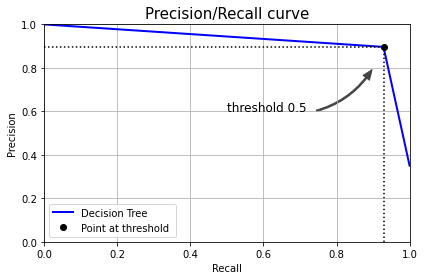

In [29]:
import matplotlib.patches as patches # extra-code - for the curved arrow

# Plot the curve
plt.plot(recalls, precisions, "b-", linewidth=2, label="Decision Tree")

# Plot the dot

idx = (thresholds >= threshold).argmax()
plt.plot([recalls[idx]], [precisions[idx]], "ko", label="Point at threshold ")
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")

plt.gca().add_patch(patches.FancyArrowPatch(
    (0.74, 0.6), (0.90, 0.8),
    connectionstyle="arc3,rad=.2",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"
))

plt.text(0.50, 0.6, "threshold 0.5", fontsize=12)
plt.title("Precision/Recall curve", fontsize=15)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.axis([0, 1, 0, 1])
plt.grid()

save_fig("Precision_recall")
plt.show()

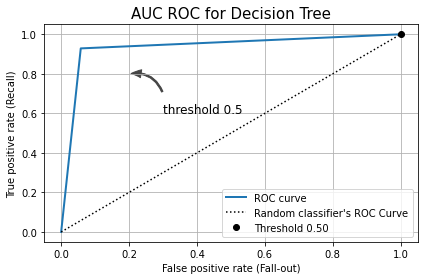

In [31]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_score)

idx = (thresholds <= threshold).argmax()

plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], "k:", label="Random classifier's ROC Curve")
plt.plot([fpr[idx]], [tpr[idx]], "ko", label="Threshold 0.50")

plt.gca().add_patch(patches.FancyArrowPatch(
    (0.3, 0.7), (0.2, 0.8),
    connectionstyle="arc3,rad=.4",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))

plt.text(0.3, 0.6, "threshold 0.5", fontsize=12)
plt.title("AUC ROC for Decision Tree", fontsize=15)
plt.ylabel("True positive rate (Recall)")
plt.xlabel("False positive rate (Fall-out)")
#plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend()

save_fig("AUC ROC")
plt.show()

In [32]:
# Plotting ROC AUC
from sklearn.metrics import roc_auc_score

roc_auc_scr = roc_auc_score(y_test, y_score)
print('roc_auc_scr:', roc_auc_scr)

roc_auc_scr: 0.9354395604395604


In [33]:
# Using cross_val_score for gaining average accuracy

from sklearn.model_selection import cross_val_score
score = cross_val_score(tree.DecisionTreeClassifier(), x_train, y_train, cv=10)
print('Average Accuracy Score {}'.format(score))

Average Accuracy Score [1.      0.90625 0.9375  1.      0.96875 0.96875 0.96875 0.96875 0.96875
 0.96875]
